In [10]:
!pip install qiskit
!pip install pylatexenc

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached pylatexenc-2.10.tar.gz (162 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136836 sha256=a2a2a0923731b456d9599b1d58f5090830c55545d6d743ef0aae8669af18305a
  Stored in directory: /Users/dnk/Library/Caches/pip/wheels/72/99/be/81d9bcdf5dd5ee5acd8119a9dd5bc07204c9ce205fd341b021
Successfully built pylatexenc
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit import *
from qiskit.providers.ibmq import least_busy

from qiskit.tools.visualization import plot_histogram

# 2bit grovers

RESULT:  {'11': 1024} 



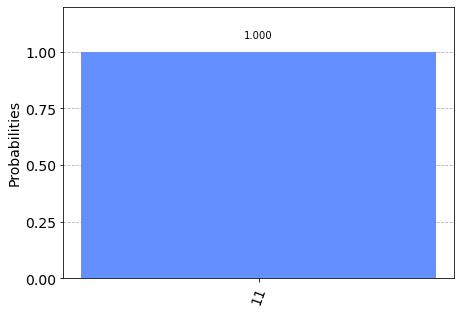

In [12]:
# Initializing circuit: define as 2 qubits
q = QuantumRegister(2, "q")
c = ClassicalRegister(2, "c")

# Create the quantum circuit
qc = QuantumCircuit(q, c)

## Step 1: Apply a Hadarmard gate to all qubits
qc.h(q)

## Step 2: Implement the Oracle circuit for state |11> + Grover diffusion
qc.cz(q[1], q[0])
qc.barrier(q)

qc.h(q)
qc.x(q)
qc.cz(q[1], q[0])
qc.x(q)
qc.h(q)
qc.barrier(q)

## Don't forget about the measurement gates!
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

qc.draw()

## Step 4: Run on backend simulator and print results
simulator = Aer.get_backend("aer_simulator")
result = execute(qc, backend=simulator).result()
counts = result.get_counts()


print("RESULT: ", counts, "\n")

plot_histogram(counts)

# 3bit Grovers

In [13]:
pi = math.pi

# Initializing circuit: define as 3 qubits
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

# Create the quantum circuit
qc = QuantumCircuit(q,c)

## Step 1: Apply a Hadarmard gate to all qubits  
qc.h(q)

## Step 2: Implement the Oracle circuit for state |111> + Grover diffusion

In [14]:

qc.cz(q[2],q[0])
qc.barrier(q)

qc.h(q)
qc.x(q)
qc.barrier(q)

qc.cx(q[1],q[0])
qc.z(q[0]), -pi/4
qc.cx(q[2],q[0])
qc.z(q[0]),pi/4
qc.cx(q[1],q[0])
qc.z(q[0]), -pi/4
qc.barrier(q)
qc.cx(q[2],q[0])
qc.z(q[0]),pi/4
qc.z(q[1]),pi/4
qc.barrier(q)
qc.cx(q[2],q[1])
qc.z(q[1]), -pi/4
qc.cx(q[2], q[1])
qc.z(q[2]), pi/4
qc.barrier(q)

qc.x(q)
qc.h(q)
qc.barrier(q)

In [16]:
## Don't forget about the measurement gates!
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

RESULT:  {'101': 138, '100': 98, '110': 117, '001': 131, '111': 135, '011': 140, '000': 134, '010': 131} 



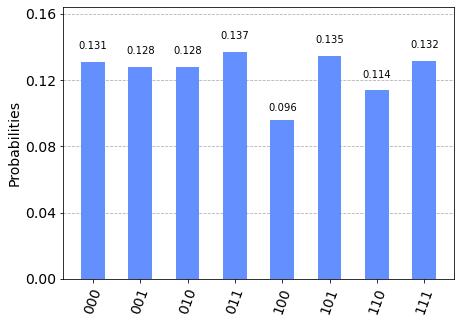

In [18]:
## Step 4: Run on backend simulator and print results
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator).result()
counts = result.get_counts()

print('RESULT: ',counts,'\n')

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

## Note: accuracy of this implementation is not 100% (may need to run a couple iterations before achieving desired result)